In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
%matplotlib inline

In [2]:
data=pd.read_csv('labelled_data_new.csv')
y=data.Label
X=data.drop(['Label'],axis=1)
data

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
0,0.5,0.6,0.5,0.8,0.6,0.7,1.0
1,0.6,0.7,0.8,0.9,0.5,0.8,2.0
2,0.6,0.4,0.3,0.3,0.4,0.6,1.0
3,0.3,0.5,0.2,0.1,0.3,0.5,0.0
4,0.7,0.6,0.7,0.8,0.9,0.5,2.0
...,...,...,...,...,...,...,...
495,0.4,0.3,0.1,0.4,0.2,0.5,0.0
496,0.4,0.6,0.5,0.6,0.5,0.4,1.0
497,0.7,0.5,0.8,0.9,0.8,0.5,1.0
498,0.3,0.5,0.4,0.6,0.6,0.6,1.0


In [3]:
data.columns

Index(['Language_vocab', 'Memory', 'Speed', 'Visual_discrimination',
       'Audio_Discrimination', 'Survey_Score', 'Label'],
      dtype='object')

In [3]:
prec=[0,0,0,0,0]
rec=[0,0,0,0,0]
f1=[0,0,0,0,0]

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=10)

In [5]:
X_test2=X_test.copy()

In [6]:
sc=StandardScaler(copy=False)
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.34038599,  0.11560035,  0.63822535,  1.14716531,  0.62539939,
         0.52455605],
       [ 2.16245217,  0.57191753, -0.26068359,  0.19384234,  0.12905067,
         0.52455605],
       [ 0.16018164,  0.11560035,  0.18877088, -1.23614212, -0.36729805,
         0.06709438],
       ...,
       [ 0.16018164, -0.34071682, -0.26068359,  2.10048828,  0.62539939,
         0.52455605],
       [-0.34038599,  1.0282347 ,  1.98658875,  0.19384234, -0.36729805,
        -0.39036729],
       [ 0.16018164,  1.94086905,  1.08767981,  1.62382679,  1.61809683,
        -0.39036729]])

In [7]:
X_train

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score
67,1.661885,1.484552,0.638225,1.147165,1.121748,0.067094
322,-0.840954,-0.797034,0.188771,-0.282819,-0.863647,-0.390367
96,0.160182,0.571918,0.188771,0.193842,0.129051,0.524556
22,2.162452,1.028235,1.537134,-0.282819,0.625399,0.982018
254,-0.340386,-0.340717,0.188771,-0.759481,-0.367298,0.067094
...,...,...,...,...,...,...
320,0.660749,0.115600,1.537134,-0.282819,1.121748,0.982018
15,0.160182,-0.340717,-0.260684,-0.282819,-0.863647,-0.847829
484,-0.340386,-0.340717,-0.260684,0.670504,-0.863647,0.524556
125,-0.340386,-0.340717,0.188771,0.193842,-0.863647,-0.390367


In [18]:
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)
pre=clf.predict(X_test)
prec[0],rec[0],f1[0],_=precision_recall_fscore_support(y_test,pre,average='macro')
print("SVM with linear kernel - Precision = %0.3f, Recall = %0.3f,
      F1-score = %0.3f" %(prec[0],rec[0],f1[0]))

SVM with linear kernel - Precision = 0.905, Recall = 0.935, F1-score = 0.919


In [17]:
clf2=SVC(kernel='rbf')
clf2.fit(X_train,y_train)
pre2=clf2.predict(X_test)
prec[1],rec[1],f1[1],_=precision_recall_fscore_support(y_test,pre2,average='macro')
print("SVM with rbf kernel - Precision = %0.3f, Recall = %0.3f, F1-score = %0.3f"
      %(prec[1],rec[1],f1[1]))

SVM with rbf kernel - Precision = 0.909, Recall = 0.942, F1-score = 0.923


In [13]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf3 = GridSearchCV(SVC(), tuned_parameters,scoring='f1_macro')
clf3.fit(X_train, y_train)
print("Best parameters set found on development set:")
print(clf3.best_params_)

Best parameters set found on development set:
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [14]:
means = clf3.cv_results_['mean_test_score']
for mean, params in zip(means, clf3.cv_results_['params']):
        print("%0.3f for %r"% (mean, params))

0.234 for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.234 for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.909 for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.234 for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.947 for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.909 for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.953 for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.947 for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.942 for {'C': 1, 'kernel': 'linear'}
0.941 for {'C': 10, 'kernel': 'linear'}
0.930 for {'C': 100, 'kernel': 'linear'}
0.930 for {'C': 1000, 'kernel': 'linear'}


In [16]:
pre3=clf3.predict(X_test)
prec[2],rec[2],f1[2],_=precision_recall_fscore_support(y_test,pre3,average='macro')
print("Gridsearch with SVM - Precision = %0.3f, Recall = %0.3f, F1-score = %0.3f"
      %(prec[2],rec[2],f1[2]))

Gridsearch with SVM - Precision = 0.919, Recall = 0.949, F1-score = 0.933


In [19]:
clf4=RandomForestClassifier(random_state=0)
clf4.fit(X_train,y_train)
pre4=clf4.predict(X_test)
prec[3],rec[3],f1[3],_=precision_recall_fscore_support(y_test,pre4,average='macro')
print("Random forest classifier - Precision = %0.3f, Recall = %0.3f,
      F1-score = %0.3f" %(prec[3],rec[3],f1[3]))

Random forest classifier - Precision = 0.904, Recall = 0.896, F1-score = 0.899


In [20]:
param2={'n_estimators' : [10,100,500,1000]}
clf5=GridSearchCV(RandomForestClassifier(random_state=0),param2,scoring='f1_macro')
clf5.fit(X_train,y_train)
print("Best parameters set found on development set:")
print(clf5.best_params_)

Best parameters set found on development set:
{'n_estimators': 1000}


In [21]:
means1 = clf5.cv_results_['mean_test_score']
for mean1, params1 in zip(means1, clf5.cv_results_['params']):
        print("%0.3f for %r"% (mean1, params1))

0.893 for {'n_estimators': 10}
0.932 for {'n_estimators': 100}
0.929 for {'n_estimators': 500}
0.935 for {'n_estimators': 1000}


In [23]:
pre5=clf5.predict(X_test)
prec[4],rec[4],f1[4],_=precision_recall_fscore_support(y_test,pre5,average='macro')
print("Gridsearch with Random forst classifier - Precision = %0.3f, Recall = %0.3f,
      F1-score = %0.3f" %(prec[4],rec[4],f1[4]))

Gridsearch with Random forst classifier - Precision = 0.904, Recall = 0.919, F1-score = 0.911


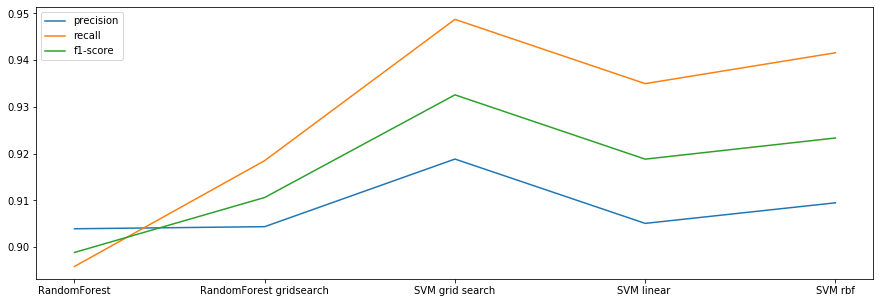

In [35]:
plt.figure(figsize=(15,5))
sns.lineplot(x=['SVM linear ','SVM rbf','SVM grid search','RandomForest','RandomForest gridsearch'],y=prec,label='precision')
sns.lineplot(x=['SVM linear ','SVM rbf','SVM grid search','RandomForest','RandomForest gridsearch'],y=rec,label='recall')
sns.lineplot(x=['SVM linear ','SVM rbf','SVM grid search','RandomForest','RandomForest gridsearch'],y=f1,label='f1-score')

In [32]:
pd.concat([X_test2,y_test],axis=1)

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
151,0.5,0.6,0.7,0.8,0.7,0.7,1.0
424,1.0,0.7,0.5,0.6,0.6,0.7,2.0
154,0.6,0.6,0.6,0.3,0.5,0.6,1.0
190,0.3,0.3,0.5,0.5,0.6,0.7,1.0
131,0.3,0.3,0.3,0.2,0.4,0.2,0.0
...,...,...,...,...,...,...,...
445,0.3,0.3,0.3,0.4,0.3,0.0,0.0
443,0.2,0.3,0.2,0.2,0.3,0.3,0.0
399,0.6,0.5,0.5,1.0,0.7,0.7,1.0
82,0.5,0.8,1.0,0.6,0.5,0.5,1.0


In [33]:
pd.Series(pre3,index=X_test.index)

151    1.0
424    2.0
154    1.0
190    1.0
131    0.0
      ... 
445    0.0
443    0.0
399    1.0
82     2.0
95     2.0
Length: 350, dtype: float64